# Relationship Between $\Delta X$ and $\Delta F$

- What is the distribution of Fourier difference map coefficients associated with small changes in real space coordinates? 

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-1.1, 1.1)

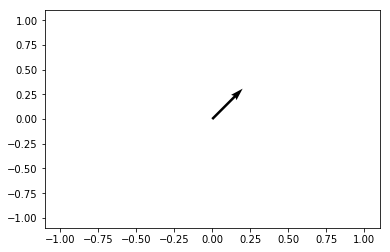

In [96]:
plt.figure()
plt.quiver(0, 0, 1, 1, scale=11)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

(-7.619555550122705, 7.619555550122705)

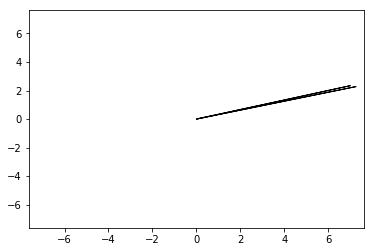

In [97]:
num_particles = 100
std = 0.001
H = np.array([1, 2, 5])


Xoff = np.random.random((num_particles, 3))

DeltaX = np.random.normal(0., std, (num_particles, 3))
Xon = np.mod(Xoff + DeltaX, 1.)

Foff = np.exp(-1j*2*np.pi*np.dot(H, Xoff.T)).sum()
Fon  = np.exp(-1j*2*np.pi*np.dot(H, Xon.T)).sum()

plt.figure()
plt.arrow(0,0, np.real(Foff), np.imag(Foff))
plt.arrow(0,0, np.real( Fon), np.imag( Fon))

limit = np.max((np.abs(Foff), np.abs(Fon)))
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)

In [124]:
DeltaF.shape

(1000,)

In [135]:
np.abs(Foff)

0.9550812266379628

array([14.35270009, 10.34408043, 10.67707825, 10.24695077,  8.60232527,
        8.1240384 ,  9.48683298, 12.04159458,  5.        ,  9.2736185 ,
        7.68114575,  9.53939201, 12.4498996 ,  7.07106781, 12.20655562,
       11.91637529, 12.20655562, 12.36931688,  7.        ,  5.74456265,
       12.20655562,  8.06225775,  8.36660027,  6.164414  ,  8.06225775,
       11.35781669,  7.28010989,  5.        ,  8.66025404,  7.28010989,
        5.74456265,  9.79795897,  7.87400787, 11.74734012,  3.74165739,
       13.19090596,  5.91607978, 10.81665383,  7.14142843, 14.45683229,
        8.77496439,  9.43398113, 14.14213562,  8.83176087,  8.24621125,
        3.74165739,  6.        , 11.48912529, 12.84523258, 13.15294644,
        6.40312424, 11.91637529,  1.41421356, 12.36931688, 14.03566885,
        7.87400787, 14.07124728,  5.47722558, 12.88409873, 10.81665383,
       10.24695077,  9.2736185 ,  8.06225775,  7.21110255,  9.8488578 ,
        9.79795897, 10.72380529, 12.24744871,  8.06225775, 13.45

Text(0, 0.5, '$\\sigma_{(|F_{on}| - |F_{off}|)/|F_{off}|}$')

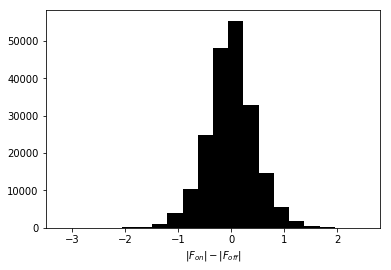

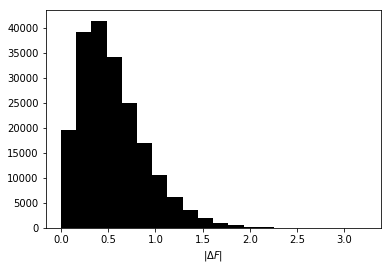

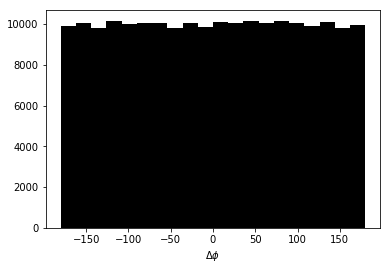

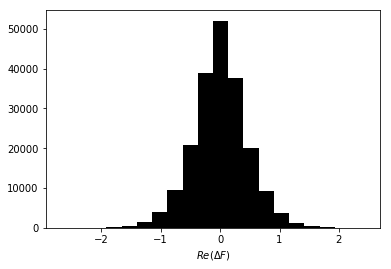

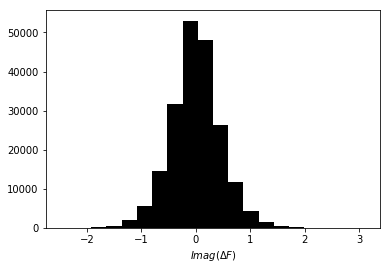

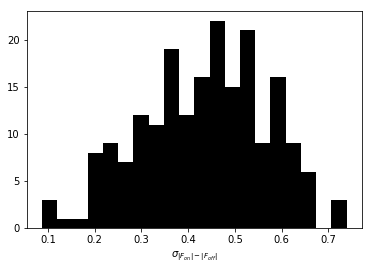

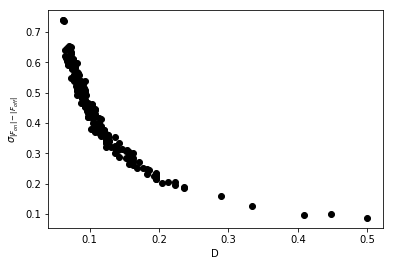

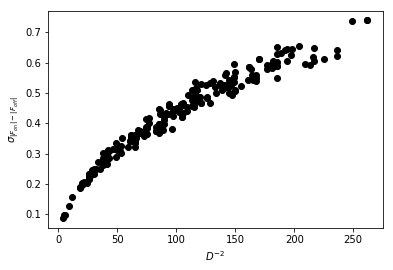

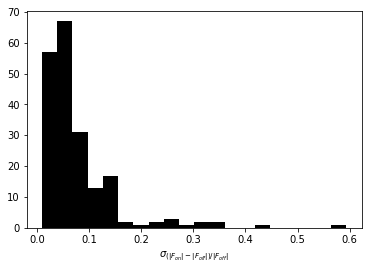

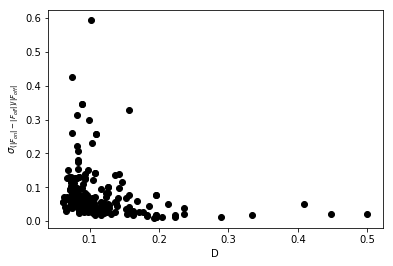

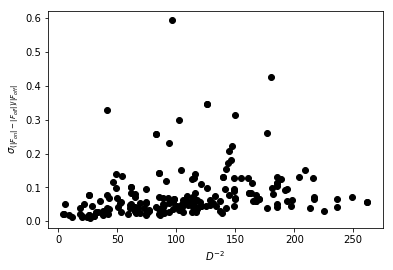

In [241]:
num_particles = 100
std = 0.001
iters = 1000
reflections=200
H = np.random.randint(0, 11, (3, reflections))
D = 1/np.linalg.norm(H, 2, 0)


Xoff = np.random.random((num_particles, 3))

DeltaX = np.random.normal(0., std, (num_particles, 3, iters))
Xon = np.mod(Xoff[:,:,None] + DeltaX, 1.)

Foff = np.exp(-1j*2*np.pi*H.T.dot(Xoff.T)).sum(-1)
Fon  = np.exp(-1j*2*np.pi*H.T.dot( Xon.T)).sum(-1)

DeltaF = Fon - Foff[:,None]
DeltaF = Fon - Foff[:,None]

plt.figure()
plt.hist((np.abs(Fon) - np.abs(Foff)[:,None]).flatten(), 20, color='k')
plt.xlabel("$|F_{on}| - |F_{off}|$")
plt.figure()
plt.hist(np.abs(DeltaF).flatten(), 20, color='k')
plt.xlabel("$|\Delta F|$")
plt.figure()
plt.hist(np.rad2deg(np.angle(DeltaF)).flatten(), 20, color='k')
plt.xlabel("$\Delta \phi$")
plt.figure()
plt.hist(np.real(DeltaF).flatten(), 20, color='k')
plt.xlabel("$Re(\Delta F)$")
plt.figure()
plt.hist(np.imag(DeltaF).flatten(), 20, color='k')
plt.xlabel("$Imag(\Delta F)$")


std = (np.abs(Fon) - np.abs(Foff)[:,None]).std(1)
plt.figure()
plt.hist(std, 20, color='k')
plt.xlabel("$\sigma_{|F_{on}| - |F_{off}|}$")

plt.figure()
plt.plot(D, std, 'ko')
plt.xlabel("D")
plt.ylabel("$\sigma_{|F_{on}| - |F_{off}|}$")

plt.figure()
plt.plot(D**-2, std, 'ko')
plt.xlabel("$D^{-2}$")
plt.ylabel("$\sigma_{|F_{on}| - |F_{off}|}$")



std = ((np.abs(Fon) - np.abs(Foff)[:,None])/np.abs(Foff)[:,None]).std(1)
plt.figure()
plt.hist(std, 20, color='k')
plt.xlabel("$\sigma_{(|F_{on}| - |F_{off}|)/|F_{off}|}$")

plt.figure()
plt.plot(D, std, 'ko')
plt.xlabel("D")
plt.ylabel("$\sigma_{(|F_{on}| - |F_{off}|)/|F_{off}|}$")

plt.figure()
plt.plot(D**-2, std, 'ko')
plt.xlabel("$D^{-2}$")
plt.ylabel("$\sigma_{(|F_{on}| - |F_{off}|)/|F_{off}|}$")